# Séance 4

## Objectifs de la séance

- Analyse de la réponse à un saut de consigne
- Extrapolation à partir de la réponse indicielle
- Tracé du signal
- Tracé des différents diagrammes fréquentiels
- Effet d’un correcteur proportionnel dans les différents diagrammes fréquentiels

In [1]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
# import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

## Réponse à une variation quelconque de consigne

Pour un système asservi à retour unitaire dont la fonction de transfert de boucle ouverte s’écrit :

$$
 G_{BO}(p)=\frac{6}{2p^2+3p+1}
$$

Nous voudrions connaître l’évolution de la sortie si la consigne passe de 10° à 30° :

### A partir de la réponse indicielle normée

:::{image} ../images/4_RepIndicielleNormee.png
:alt: RepIndicielle10-30
:width: 250px
:align: right
:::

Tracez tout d'abord la réponse indicielle et relevez-en les grandeurs caractéristiques:

- Régime établi = ...
- Dépassement relatif = ...
- $t_{r_{5\%}}$ = ...

- Régime établi = 0.8580265483248184 
- Dépassement relatif = 25.161365744447806 % 
- tr_5% = 4.077825465220377 s



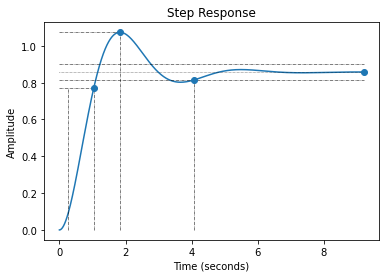

In [2]:
G_BO = ml.tf(6, [2, 3, 1])
G_BF = ml.feedback(G_BO, 1)
info = rlf.stepWithInfo(G_BF, NameOfFigure='Step with infos')

print("- Régime établi =", info.DCGain,
"\n- Dépassement relatif =", info.Overshoot, "%",
"\n- tr_5% =", info.SettlingTime, "s\n")

En déduire l’allure du signal de sortie si le signal d’entrée est celui donné à la figure suivante :

:::{image} ../images/4_RepIndicielle10-30.png
:alt: RepIndicielle10-30
:width: 250px
:align: right
:::

**Calculs:**
- de la valeur initiale:
- de la valeur finale:
- du dépassement absolu:
- du dépassement relatif:

::::{toggle}
- Valeur initiale = $10*\frac{6}{7} = 8.571$
- Valeur finale = $30*\frac{6}{7} = 25.714$
- Dépassement absolu = $8.571+(25.714-8.571)*(1+0.252) = 30.028$
- Dépassement relatif = $(\frac{30.028}{25.714}-1)*100 = 16.774\%$

:::{note}
Dépassement relatif de référence = 25.2% (cf. valeur calculée précédemment)
:::

::::

In [3]:
cons_init = 10
cons_fin = 30
val_init = cons_init*6/7
val_fin = cons_fin*6/7
d_abs = val_init+(val_fin-val_init)*(1+info.Overshoot/100)
d_rel = (d_abs/val_fin-1)*100
print("Val_init =", val_init)
print("Val_fin =", val_fin)
print("D_abs =", d_abs)
print("D_rel =", d_rel)

Val_init = 8.571428571428571
Val_fin = 25.714285714285715
D_abs = 30.0276626990482
D_rel = 16.774243829631885


### Via Python



In [1]:
import warnings # Package permettant de gérer l'affichage de messages d'erreurs

warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, __, __ = rlf.stepFromTo(G_BF, 10, 30, focus=False)
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
print("D_abs =", peak)
print("T_dep =", peakTime, "s\n")

NameError: name 'rlf' is not defined

:::{admonition} Astuce
:class: tip
La fonction `stepFromTo` peut également limiter l'affichage à juste la partie intéressante du step et ainsi permettre d'utiliser la fonction `stepInfo` pour afficher toutes les infos que l'on souhaite obtenir.
:::

DCGain : 25.7319479489517
Overshoot : 16.77134396010629
Peak : 30.047541447105907
PeakTime : 1.8328577340232597
RiseTime : 0.7847209996923704
SettlingTime : 4.076496648636657



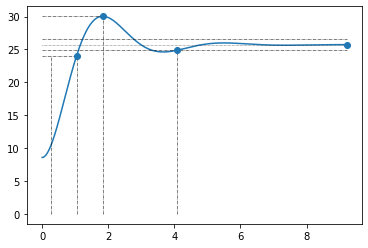

In [5]:
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF, 10, 30, focus=True)
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
rlf.printInfo(info)
print("") # Pour laisser une ligne vide après l'affichage des infos afin de les séparer de ce qui suit

Comparez avec un saut de consigne de 0° à 30°, de 10° à 30° et de 29° à 30°.

DCGain : 25.74079264348003
Overshoot : 25.161344614627247
Peak : 32.21752218704266
PeakTime : 1.8328577340232597
RiseTime : 0.7847209996923704
SettlingTime : 4.076496648636657

DCGain : 25.7319479489517
Overshoot : 16.77134396010629
Peak : 30.047541447105907
PeakTime : 1.8328577340232597
RiseTime : 0.7847209996923704
SettlingTime : 4.076496648636657

DCGain : 25.715143029347644
Overshoot : 0.8144423371029497
Peak : 25.92457804122523
PeakTime : 1.8328577340232597
RiseTime : 0.7847209996923705
SettlingTime : 4.078338716711053



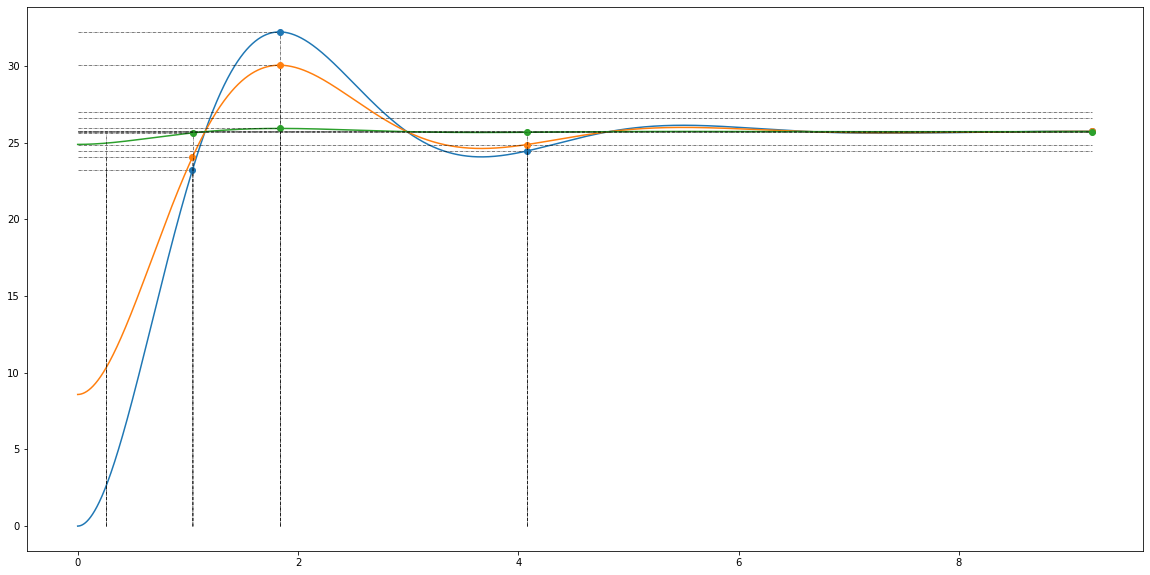

In [6]:
# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps comparaison",figsize=(20,10))
ax = fig.subplots()

# Saut de 0° à 30°
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF, 0, 30, focus=True, NameOfFigure="Steps comparaison")
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
rlf.printInfo(info)
print("")

# Saut de 10° à 30°
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF, 10, 30, focus=True, NameOfFigure="Steps comparaison")
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
rlf.printInfo(info)
print("")

# Saut de 29° à 30°
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF, 29, 30, focus=True, NameOfFigure="Steps comparaison")
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
rlf.printInfo(info)
print("")

## Diagrammes fréquentiels

Représentez le système modélisé par un pôle simple
$
 H_{BO}(p)=\frac{1}{p+1}
$
dans les différents diagrammes pour visualiser l’effet d’un pôle : p=-1, $\tau$=1s et $\omega_n$=1rad/s

In [7]:
H_BO = ml.tf(1, [1, 1])

### Nyquist (*cf. p. 4-6*)

Afin de tracer le diagramme de Nyquist, il suffit d'entrer la ligne de code suivante:

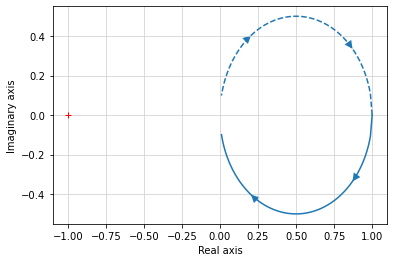

In [8]:
real, imag, freq = ml.nyquist(H_BO);

:::{admonition} Attention
:class: warning
Attention, le graphique est tracé aussi pour des $\omega_n<0$ (en trait discontinu) ce qui n’a aucun sens physiquement! Il ne faut donc tenir compte **que** du tracé en trait plein.
:::

On peut également demander à python d'afficher les fréquences sur le graphe:

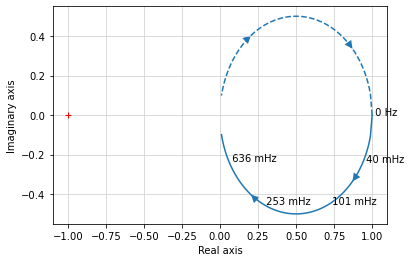

In [9]:
ml.nyquist(H_BO, label_freq=200);

### Bode (*cf. p. 4-7 à 4-12*)

Pour tracer le diagramme de Bode, on peut soit laisser python fixer automatiquement la plage de variation de la pulsation:

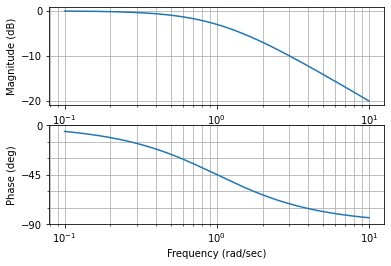

In [10]:
ml.bode(H_BO);

soit imposer l’intervalle de variation de la pulsation en faisant ainsi:

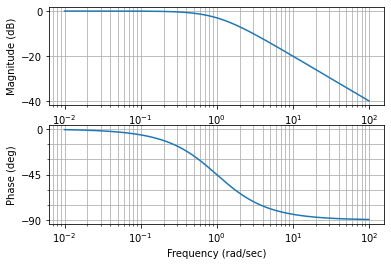

In [11]:
w = np.logspace(-2, 2, 10000) # Echelle logarithmique allant de 10^-2 à 10^2
ml.bode(H_BO, w);

La différence entre les 2 solutions est le nombre de points de calculs (= points d’affichage)

:::{admonition} À faire
:class: seealso
Comparez la courbe réelle à son tracé asymptotique (voir pages 4-11 et 12).
:::

### Nichols (*cf. p. 4-18*)

On peut soit utiliser la fonction `nichols` du package `python Control` et on obtient ceci:

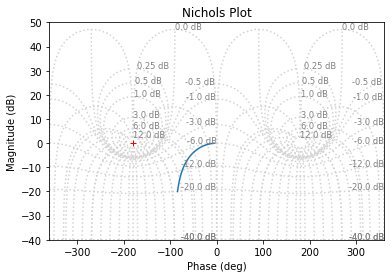

In [12]:
ml.nichols(H_BO)

Ou on utilise la fonction `nichols` revue dans le package `ReguLabFct` pour faciliter sa lecture dans le cadre du laboratoire de régulation:

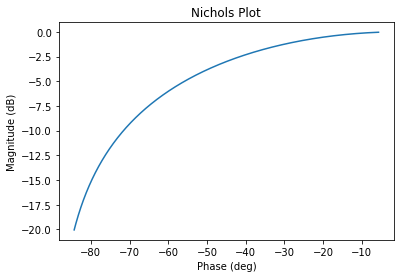

In [13]:
rlf.nichols(H_BO)

### Résumé sur l'effet d'un pôle (*cf. p. 4-16*)

Module: $\left\{
    \begin{array}{ll}
        \omega<\omega_c : rien\\
        \omega>\omega_c : -20dB/décade
    \end{array}
\right.$

Phase: $\left\{
    \begin{array}{ll}
        \omega<\omega_c : rien\\
        \omega>\omega_c : -90°
    \end{array}
\right.$

### Effet d’une modification du gain statique sur les différents diagrammes

Observez l’effet du gain statique : K=2, 5, 10 …

Tracez les 3 graphiques:

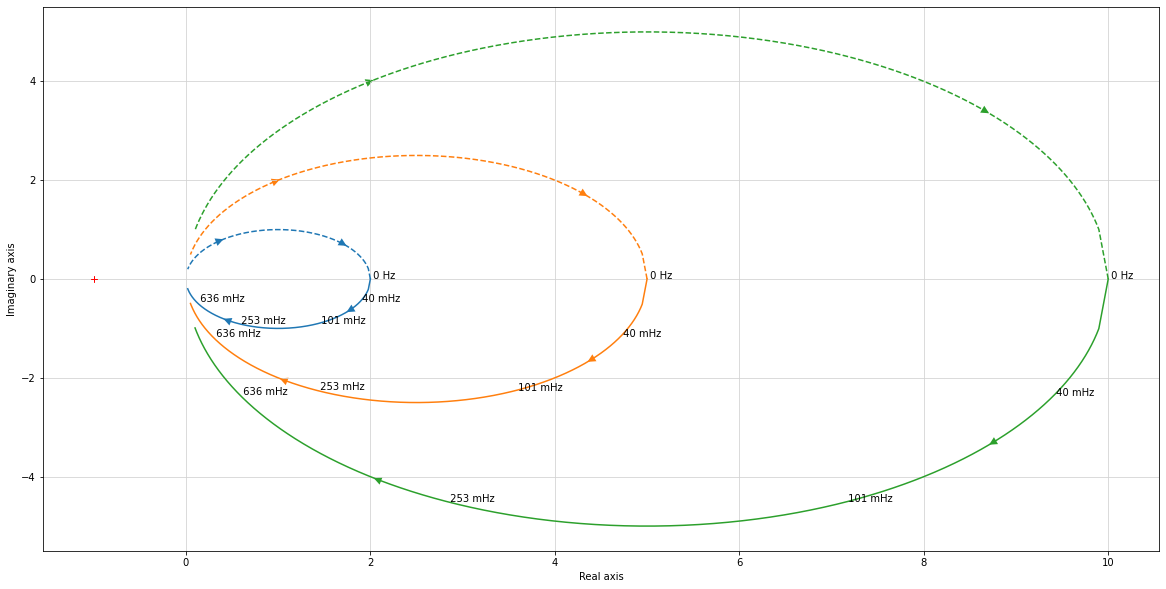

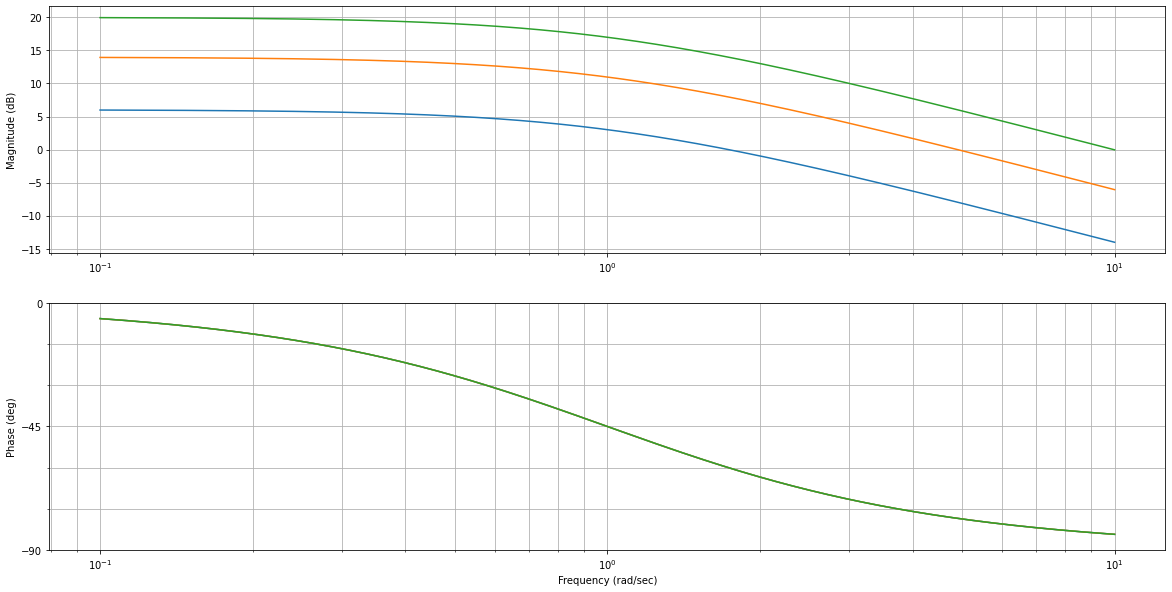

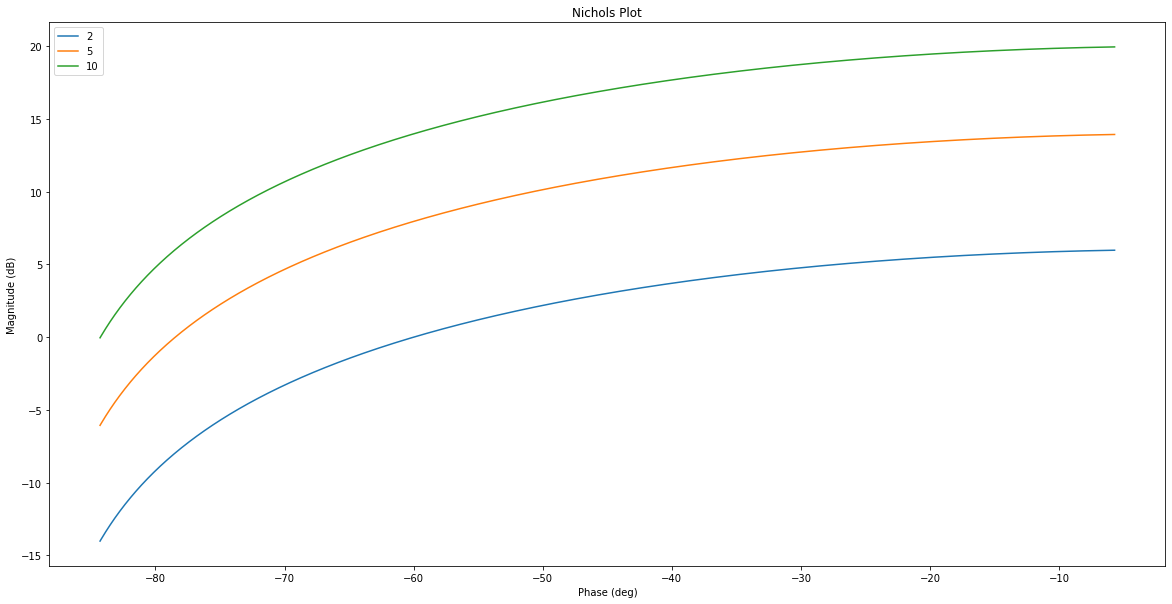

In [14]:
K_list = [2, 5, 10]

for K in K_list:

    fig_nyquist = plt.figure("Nyquist",figsize=(20,10))
    ml.nyquist(K*H_BO, label_freq=200)
    
    fig_bode = plt.figure("Bode",figsize=(20,10))
    ml.bode(K*H_BO)
    
    fig_nichols = plt.figure("Nichols",figsize=(20,10))
    rlf.nichols(K*H_BO, NameOfFigure="Nichols", labels=[str(K)])

Concluez sur l’effet d’une augmentation de constante (cf. augmentation du gain proportionnel en BO) :

Effet dans:

- Nyquist : ...
- Bode : ...
- Nichols : ...

:::{toggle}
- Nyquist : Étalement suivant l'axe des réels
- Bode: Translation verticale du gain de 20log(K) et phase indépendante de K
- Nichols: Translation verticale de la courbe de 20log(K)

Car 
$
\begin{alignat*}{2}
K*H\Rightarrow
\left\{ \begin{aligned}
    \begin{array}{ll}
        M_{dB} = 20*\log(K*H) = 20\log(H)+20\log(K) = 20\log(H) + translation\\
        \varphi = \varphi(K)+\varphi(H)=0^{\circ}+\varphi(H)
    \end{array}
\end{aligned}\right.
\end{alignat*}\
$
:::

:::{danger}
Attention que l'analyse fréquentielle s'applique sur le système en **boucle ouverte** contrairement à l'analyse temporelle ($\rightarrow$ réponse indicielle) qui s'applique, elle, sur le système en **boucle fermée**!
:::